In [15]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

# 2.1 Color Model Visualization

In [16]:
src = cv2.imread('AdobeStock_41652640-1.jpg')

<IPython.core.display.Javascript object>


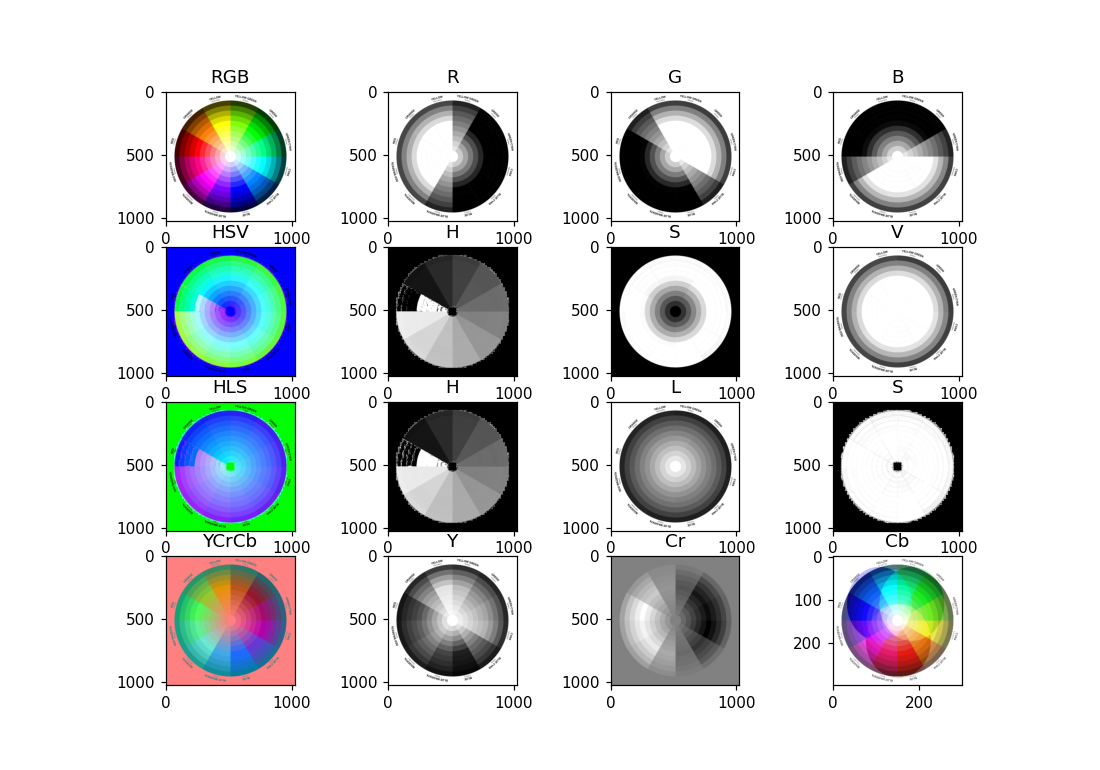

In [21]:
rows = 4
columns = 4
fig = plt.figure(figsize=(10, 7))
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)

fig.add_subplot(rows,columns,1)
plt.title('RGB')
plt.imshow(img)
plt.show()

fig.add_subplot(rows,columns,2)
plt.title('R')
plt.imshow(r, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,3)
plt.title('G')
plt.imshow(g, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,4)
plt.title('B')
plt.imshow(b, cmap = 'gray')
plt.show()

src2 = cv2.imread('AdobeStock_41652640-1.jpg')
img2 = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img2)
fig.add_subplot(rows,columns,5)
plt.title('HSV')
plt.imshow(img2)
plt.show()


fig.add_subplot(rows,columns,6)
plt.title('H')
plt.imshow(h, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,7)
plt.title('S')
plt.imshow(s, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,8)
plt.title('V')
plt.imshow(v, cmap = 'gray')
plt.show()


src3 = cv2.imread('AdobeStock_41652640-1.jpg')
img3 = cv2.cvtColor(src3, cv2.COLOR_BGR2HLS)
h2, l2, s2 = cv2.split(img3)
fig.add_subplot(rows,columns,9)
plt.title('HLS')
plt.imshow(img3)
plt.show()


fig.add_subplot(rows,columns,10)
plt.title('H')
plt.imshow(h2, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,11)
plt.title('L')
plt.imshow(l2, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,12)
plt.title('S')
plt.imshow(s2, cmap = 'gray')
plt.show()



src4 = cv2.imread('AdobeStock_41652640-1.jpg')
img4 = cv2.cvtColor(src4, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(img4)
fig.add_subplot(rows,columns,13)
plt.title('YCrCb')
plt.imshow(img4)
plt.show()


fig.add_subplot(rows,columns,14)
plt.title('Y')
plt.imshow(y, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,15)
plt.title('Cr')
plt.imshow(cr, cmap = 'gray')
plt.show()

fig.add_subplot(rows,columns,16)
plt.title('Cb')
plt.imshow(cb, cmap = 'gray')
plt.show()

# 2.2 Image Addition

In [81]:
#create weight array


    
img_1 = cv2.imread('AdobeStock_41652640-1.jpg')
img_2 = cv2.imread('istockphoto-671857776-170667a.jpg')

im1_resize = cv2.resize(img_1,(300,300))
im2_resize = cv2.resize(img_2,(300,300))

dst = cv2.addWeighted(im1_resize,0.7,im2_resize,0.3,0)

plt.title('Cb')
plt.imshow(dst, cmap = 'gray')
plt.show()

# create weight

In [62]:
w1 = [0]
w2 = [1]
for i in range(1,101,1):
    w1.append(i/100)
    w2.append(i/100)
w2.sort(reverse=True)

for i in range(100,0,-1):
    w1.append(i/100)
w1.append(0)

for i in range(1,101,1):
    w2.append(i/100)
w2.append(1)

# write video

In [63]:
#cv2.VideoWriter('Path', cv2.VideoWriter_fourcc(*'MP4V'), 'FPS', (W,H))
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter('out.mp4', fourcc, 10, (300, 300))

for i in range(202):
    writer.write(cv2.addWeighted(im1_resize,w1[i],im2_resize,w2[i],0))
    
writer.release() 

# 2.3 Image Bitwise AND operation

In [122]:
zero_arr = np.zeros((300, 300), dtype=int)

In [123]:
print(zero_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# x = 150->250
# y = 50 ->150

In [125]:
zero_arr[150][50]

0

In [126]:
x = []
y = []

for i in range(150, 251,1):
    x.append(i)
    
for i in range(50,151,1):
    y.append(i)

# Fill 255

In [153]:
for i in range(len(x)):
    for j in range(len(y)):
        zero_arr[x[i]][y[j]] = 255
cv2.imwrite('mask.jpg',zero_arr)

True

In [128]:
plt.imshow(zero_arr, cmap='gray')
plt.show()


<IPython.core.display.Javascript object>


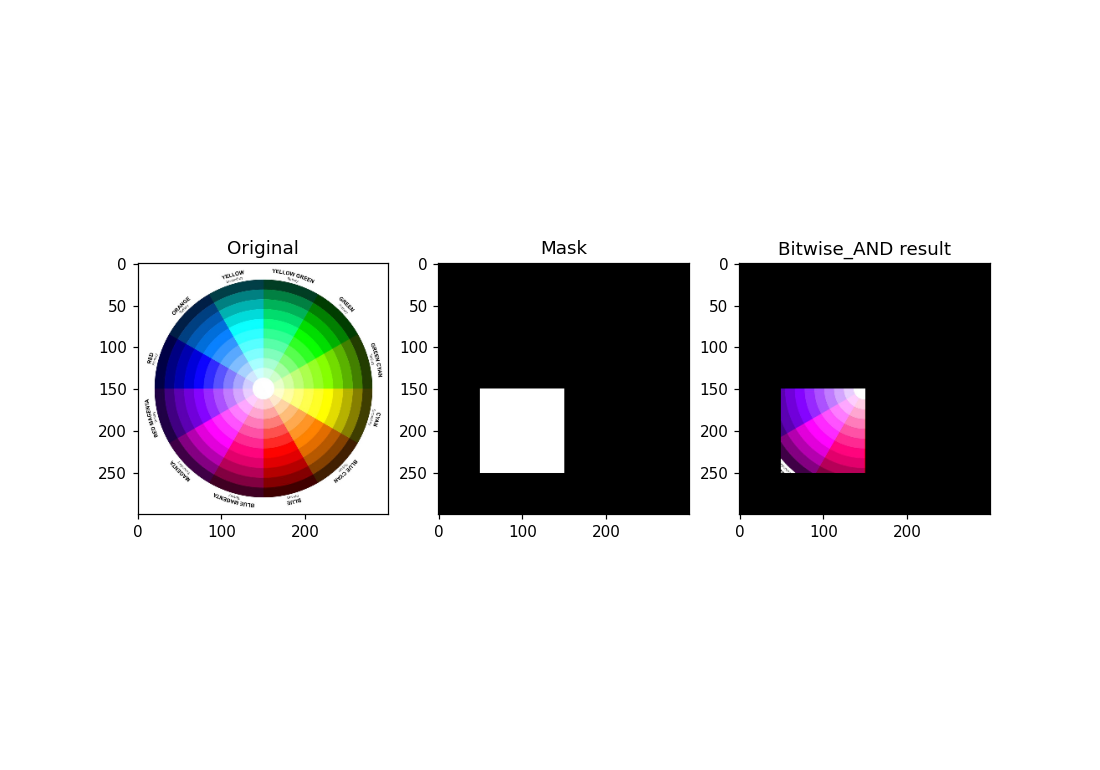

In [157]:
row = 1
column = 3
fig2 = plt.figure(figsize=(10, 7))
mask = cv2.imread('mask.jpg')


fig2.add_subplot(row,column,1)
plt.title('Original')
plt.imshow(im1_resize)
plt.show()

fig2.add_subplot(row,column,2)
plt.title('Mask')
plt.imshow(zero_arr, cmap='gray')
plt.show()




bitwiseAND = cv2.bitwise_and(im1_resize, mask)
fig2.add_subplot(row,column,3)
plt.title('Bitwise_AND result')
plt.imshow(bitwiseAND)
plt.show()